In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns


In [33]:
# fix Random seed for reproducibility

seed = 7
numpy.random.seed(seed)

#load dataset

dataset=pd.read_csv("C:\\Users\\hp\\Downloads\\forest_fires.csv")




In [34]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [48]:
label_encoder = LabelEncoder()

In [50]:
dataset['fire_size']=label_encoder.fit_transform(dataset.size_category)

In [51]:
# Split data into input(X) and output(Y)
X = dataset.iloc[:,2:-2].values
Y = dataset.iloc[:,-1].values
dataset.shape

(517, 32)

<AxesSubplot:ylabel='Density'>

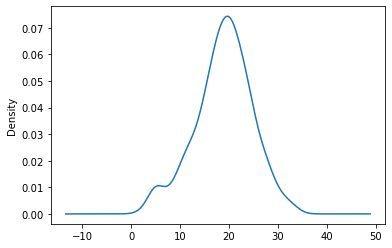

In [82]:
dataset.temp.plot(kind='kde')

In [52]:
from sklearn.preprocessing import StandardScaler

a = StandardScaler()
a.fit(X)
X_std = a.transform(X)

In [53]:
#Create model

model = Sequential()
model.add(layers.Dense(28, input_dim = 28, activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [54]:
help(model.compile)

Help on method compile in module keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, steps_per_execution=None, jit_compile=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(),
                           tf.keras.metrics.FalseNegatives()])
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: Loss function. Maybe be a string (name of loss function), or
          a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where `y_true

In [55]:
# Compile model

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [56]:
# Fit model

model.fit(X, Y, validation_split=0.33, epochs=300, batch_size=10)

Epoch 1/300
35/35 [==============================] - 6s 37ms/step - loss: 12.1465 - accuracy: 0.5405 - val_loss: 2.5764 - val_accuracy: 0.6550
Epoch 2/300
35/35 [==============================] - 0s 8ms/step - loss: 1.9823 - accuracy: 0.6214 - val_loss: 1.4386 - val_accuracy: 0.6374
Epoch 3/300
35/35 [==============================] - 0s 9ms/step - loss: 1.1674 - accuracy: 0.6965 - val_loss: 1.0559 - val_accuracy: 0.7135
Epoch 4/300
35/35 [==============================] - 0s 9ms/step - loss: 0.8734 - accuracy: 0.7283 - val_loss: 0.8873 - val_accuracy: 0.6316
Epoch 5/300
35/35 [==============================] - 0s 10ms/step - loss: 0.7127 - accuracy: 0.7543 - val_loss: 0.4971 - val_accuracy: 0.8421
Epoch 6/300
35/35 [==============================] - 0s 10ms/step - loss: 0.4627 - accuracy: 0.8324 - val_loss: 0.4898 - val_accuracy: 0.8012
Epoch 7/300
35/35 [==============================] - 0s 9ms/step - loss: 0.3945 - accuracy: 0.8613 - val_loss: 0.4132 - val_accuracy: 0.8596
Epoch 8/3

35/35 [==============================] - 0s 7ms/step - loss: 0.1418 - accuracy: 0.9711 - val_loss: 0.7045 - val_accuracy: 0.7778
Epoch 116/300
35/35 [==============================] - 0s 9ms/step - loss: 0.0750 - accuracy: 0.9711 - val_loss: 0.0705 - val_accuracy: 0.9649
Epoch 117/300
35/35 [==============================] - 0s 10ms/step - loss: 0.0680 - accuracy: 0.9827 - val_loss: 0.1451 - val_accuracy: 0.9532
Epoch 118/300
35/35 [==============================] - 0s 10ms/step - loss: 0.0320 - accuracy: 0.9855 - val_loss: 0.0685 - val_accuracy: 0.9649
Epoch 119/300
35/35 [==============================] - 0s 9ms/step - loss: 0.0624 - accuracy: 0.9653 - val_loss: 0.5081 - val_accuracy: 0.8889
Epoch 120/300
35/35 [==============================] - 0s 10ms/step - loss: 0.1202 - accuracy: 0.9566 - val_loss: 0.3246 - val_accuracy: 0.9123
Epoch 121/300
35/35 [==============================] - 0s 12ms/step - loss: 0.0928 - accuracy: 0.9682 - val_loss: 0.1177 - val_accuracy: 0.9474
Epoch 122

35/35 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 0.9566 - val_loss: 0.2661 - val_accuracy: 0.9357
Epoch 230/300
35/35 [==============================] - 0s 6ms/step - loss: 0.0720 - accuracy: 0.9711 - val_loss: 0.0813 - val_accuracy: 0.9591
Epoch 231/300
35/35 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 0.0889 - val_accuracy: 0.9649
Epoch 232/300
35/35 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0887 - val_accuracy: 0.9708
Epoch 233/300
35/35 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 0.9884 - val_loss: 0.1106 - val_accuracy: 0.9532
Epoch 234/300
35/35 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 0.9855 - val_loss: 0.1566 - val_accuracy: 0.9474
Epoch 235/300
35/35 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9682 - val_loss: 0.1865 - val_accuracy: 0.9474
Epoch 236/300

In [68]:
# Evaluate the model

scores=model.evaluate(X,Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 5ms/step - loss: 0.0411 - accuracy: 0.9884
accuracy: 98.84%


In [69]:
# Visualize training history
# list all data in history

model.history.history.keys()

dict_keys([])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be plac

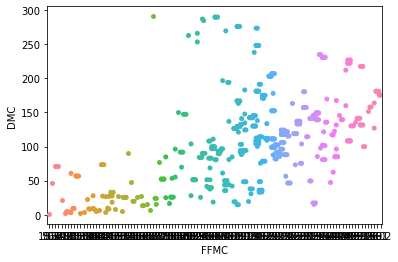

In [83]:
sns.swarmplot(x='FFMC',y='DMC',data=dataset)
plt.show()

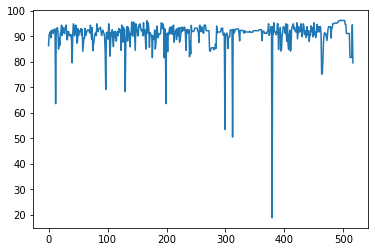

In [85]:
plt.plot(dataset)

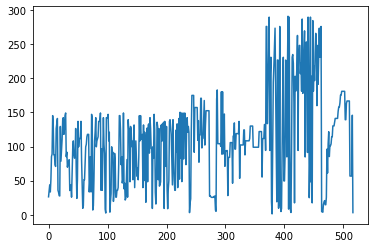

In [86]:
plt.plot(dataset)

## Accuracy 98.84